In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json
from citipy import citipy
from config import api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

In [2]:
# Random City selection of 500+ cities using citypy (not repeated)
city_set = []
while len(city_set) <=700:
    r_lat = round(np.random.random()*90,2)*(np.random.randint(0,2)*2 - 1)
    r_lon = round(np.random.random()*180,2)*(np.random.randint(0,2)*2 - 1)
    city = citipy.nearest_city(r_lat, r_lon)
    if not([city.city_name, city.country_code] in city_set):
        city_set.append([city.city_name, city.country_code])
    print(city.city_name)

# print(f"city_set have {len(city_set)} of unique cities in list")


ushuaia
san policarpo
imeni poliny osipenko
vaini
ponta do sol
mataura
jamestown
cabo san lucas
mataura
mar del plata
strezhevoy
hearst
illoqqortoormiut
punta arenas
castro
victoria
hami
saint-philippe
toma
afua
punta arenas
busselton
santa catarina de tepehuanes
rocha
tuktoyaktuk
qaanaaq
saint-leu
bengkulu
mongoumba
jamestown
vila franca do campo
mesetas
vila franca do campo
dakoro
castro
khatanga
ostrovnoy
yellowknife
avarua
narsaq
mys shmidta
vaini
mataura
el dorado
cape town
berbera
chokurdakh
bredasdorp
lagoa
rancho mirage
rikitea
bambous virieux
zhangjiakou
sitka
barrow
toftir
san andres
rikitea
pacific grove
hermanus
fort-shevchenko
tiksi
kruisfontein
barrow
pisco
severo-kurilsk
coahuayana
mizdah
keffi
batemans bay
tuktoyaktuk
mar del plata
vaini
tucuma
punta arenas
sorvag
tignere
vaini
yining
bismarck
port hardy
vaini
barentsburg
kapaa
krasnoselkup
teya
punta arenas
alofi
albany
ushuaia
tabiauea
hithadhoo
quatre cocos
east london
cherskiy
taolanaro
fort-shevchenko
rikitea
honjo

kuche
mataura
puerto ayora
salinopolis
revda
new norfolk
rikitea
mataura
amderma
kapaa
rikitea
ust-omchug
bonthe
sapao
asau
okhotsk
mehamn
bluff
atuona
mataura
rikitea
bredasdorp
bluff
chara
sitka
illoqqortoormiut
ushuaia
matagami
saint-philippe
olafsvik
atuona
saint-philippe
bambous virieux
thompson
hithadhoo
at-bashi
diapaga
hobyo
bluff
port hawkesbury
cape town
bethel
gizo
cherskiy
ucluelet
ushuaia
kozhva
tiksi
attawapiskat
port alfred
nueva helvecia
codrington
sorland
albany
mar del plata
east london
kutum
elk city
rikitea
cape town
djenne
nizhneyansk
taolanaro
amderma
albany
ust-tsilma
rikitea
quatre cocos
puerto ayora
ouegoa
butaritari
beloha
ixtapa
hermanus
kondopoga
malwan
pousat
sao joao da barra
kollo
carnarvon
black river
barentsburg
busselton
torbay
saldanha
sunrise manor
teya
asosa
bairiki
illoqqortoormiut
atuona
san patricio
praia da vitoria
qingdao
koygorodok
new norfolk
butaritari
saint george
ushuaia
cape town
cape town
thompson
bredasdorp
san quintin
kaitangata
paine


In [3]:
city_weather_set = []
for city in city_set:
    query_url = f"{url}appid={api_key}&q={city[0]}"
    data = requests.get(query_url)
    data_json = data.json()
    if ("main" in data_json.keys()):
        city_weather_set.append(data_json)

In [4]:
len(city_weather_set)

649

In [14]:
# Create a series of scatter plots to showcase
temperature = []
latitude = []
humidity = []
cloudiness = []
wind_speed = []
for i in range(len(city_weather_set)):
    if("main" in city_weather_set[i].keys()):
        temperature.append(city_weather_set[i]["main"]["temp"])
        latitude.append(city_weather_set[i]["coord"]["lat"])
        humidity.append(city_weather_set[i]["main"]["humidity"])
        cloudiness.append(city_weather_set[i]["clouds"]["all"])
        wind_speed.append(city_weather_set[i]["wind"]["speed"])
weather_df = pd.DataFrame({"latitude": latitude, "temperature":temperature, "humidity":humidity, "cloudiness":cloudiness, "wind_speed":wind_speed})

In [15]:
weather_df

,latitude,temperature,humidity,cloudiness,wind_speed
0,-54.80,278.15,85,75,4.10
1,12.18,301.49,65,6,3.18
2,52.42,280.57,55,0,1.74
3,-21.20,296.15,83,20,2.10
4,32.67,289.33,67,75,5.70
...,...,...,...,...,...
644,-11.95,279.80,22,75,0.85
645,63.84,274.15,80,75,2.10
646,50.23,271.15,63,1,4.10
647,40.70,278.18,81,75,10.80


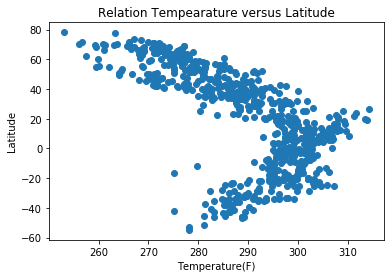

In [19]:
# Series of Scatter plot to show
# Temperature (F) vs. Latitude

plt.scatter(weather_df.temperature, weather_df.latitude)
plt.xlabel("Temperature(F)")
plt.ylabel("Latitude")
plt.title("Relation Tempearature versus Latitude")
plt.show()


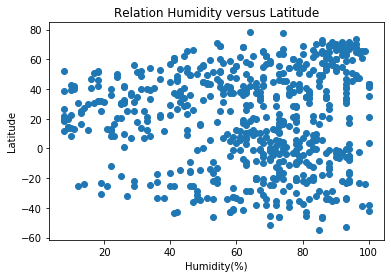

In [17]:
# Series of Scatter plot to show
# Humidity (%) vs. Latitude

plt.scatter(weather_df.humidity, weather_df.latitude)
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.title("Relation Humidity versus Latitude")
plt.show()

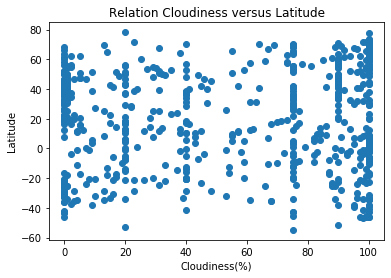

In [20]:
# Series of Scatter plot to show
# Cloudiness (%) vs. Latitude
plt.scatter(weather_df.cloudiness, weather_df.latitude)
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.title("Relation Cloudiness versus Latitude")
plt.show()

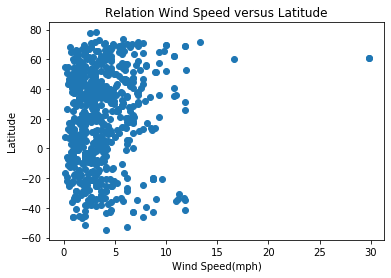

In [21]:
# Series of Scatter plot to show
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_df.wind_speed, weather_df.latitude)
plt.xlabel("Wind Speed(mph)")
plt.ylabel("Latitude")
plt.title("Relation Wind Speed versus Latitude")
plt.show()

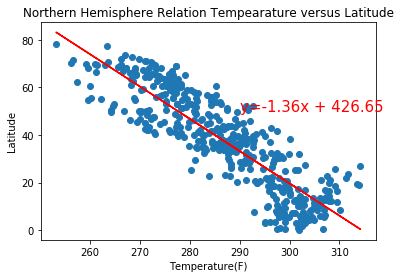

R squre value is 0.76


In [38]:
# Northern Hemisphere - Temperature (F) vs. Latitude
nor_lat = weather_df.loc[weather_df.latitude >= 0]["latitude"]
nor_temp = weather_df.loc[weather_df.latitude >= 0]["temperature"]
plt.scatter(nor_temp, nor_lat)
plt.xlabel("Temperature(F)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Relation Tempearature versus Latitude")


[slope, intercept, r_value, p_value, std_err] = st.linregress(nor_temp, nor_lat)
ligress_value = nor_temp * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(nor_temp, ligress_value, "r-")
plt.annotate(str_eq, (290, 50), color="red", fontsize="15" )
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

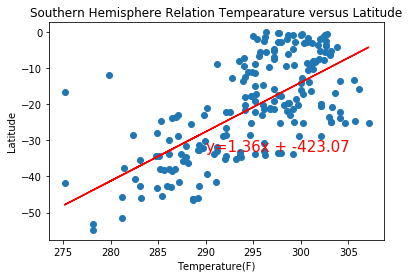

R squre value is 0.44


In [39]:
# Southern Hemisphere - Temperature (F) vs. Latitude
south_lat = weather_df.loc[weather_df.latitude < 0]["latitude"]
south_temp = weather_df.loc[weather_df.latitude < 0]["temperature"]
plt.scatter(south_temp, south_lat)
plt.xlabel("Temperature(F)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Relation Tempearature versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(south_temp, south_lat)
ligress_value = south_temp * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(south_temp, ligress_value, "r-")
plt.annotate(str_eq, (290, -33), color="red", fontsize="15" )
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

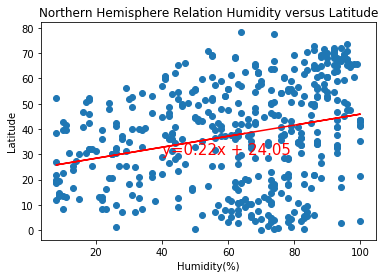

R squre value is 0.08


In [48]:
# Northern Hemisphere - Humidity (%) vs. Latitude
nor_lat = weather_df.loc[weather_df.latitude >= 0]["latitude"]
nor_hum = weather_df.loc[weather_df.latitude >= 0]["humidity"]
plt.scatter(nor_hum, nor_lat)
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere Relation Humidity versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(nor_hum, nor_lat)
ligress_value = nor_hum * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(nor_hum, ligress_value, "r-")
plt.annotate(str_eq, (40, 30), color="red", fontsize="15" )
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

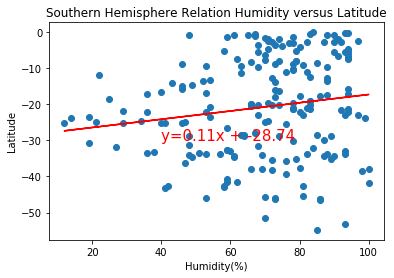

R squre value is 0.03


In [51]:
# Southern Hemisphere - Humidity (%) vs. Latitude
south_lat = weather_df.loc[weather_df.latitude < 0]["latitude"]
south_hum = weather_df.loc[weather_df.latitude < 0]["humidity"]
plt.scatter(south_hum, south_lat)
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere Relation Humidity versus Latitude")

[slope, intercept, r_value, p_value, std_err] = st.linregress(south_hum, south_lat)
ligress_value = south_hum * slope + intercept
str_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"
plt.plot(south_hum, ligress_value, "r-")
plt.annotate(str_eq, (40, -30), color="red", fontsize="15" )
plt.show()
print(f"R squre value is {round(r_value**2,2)}")

In [42]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

In [43]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

In [44]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [ ]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude